In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap='Greys')
    plt.show()

# Zadanie 4. Klasyfikacja

1. Wczytaj dane MNIST z Sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
```py
from sklearn import datasets

digits = datasets.load_digits()
# dane są w digits.images, klasy w digits.target
```
2. Dla każdego obrazka stwórz wektor cech (podobnie jak w przykładzie ze slajdów - nie jak w przykładzie z Sklearn). Można dodać własne cechy.
3. Dokonaj klasyfikacji powstałego datasetu przy użyciu dowolnego klasyfikatora.
4. Wyświetl raport klasyfikacji i confusion matrix.
```py
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
```
5. *Poeksperymentuj z cechami i klasyfikatorami - jaki najlepszy wynik uda Ci się osiągnąć?

In [3]:
from sklearn import datasets, svm, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import pandas as pd

In [4]:
digits = datasets.load_digits()

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

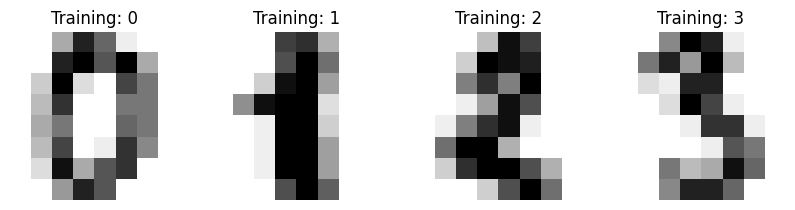

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [7]:
image = digits.images[0]

In [8]:
def count_features(image):
    ret, thresh = cv2.threshold(image, 3, 15, cv2.THRESH_BINARY)
    thresh = thresh.astype('uint8')
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # odrzucamy kontury wewnętrzne, bierzemy informacje o "potomkach"

    filtered_contours = []
    has_a_child = []

    for contour, h in zip(contours, hierarchy[0]):
      if h[3] == -1:
        filtered_contours.append(contour)
        if h[2] != -1:
          has_a_child.append(1)
        else:
          has_a_child.append(0)

    # zbieranie cech

    features_list = []

    for contour, child in zip(filtered_contours, has_a_child):
      moments = cv2.moments(contour)
      hu_moments = cv2.HuMoments(moments)

      area = cv2.contourArea(contour)
      lenght = cv2.arcLength(contour, True)

      if lenght > 0:
        features = {x: hu[0] for x, hu in enumerate(hu_moments)}
        features['circularity'] = 4 * np.pi * area / lenght ** 2
        features['has_child'] = child
        features_list.append(features)

    return features_list[0]

In [9]:
features = []
for image in digits.images:
    features.append(count_features(image))

In [10]:
data = pd.DataFrame(features)

In [11]:
data

,0,1,2,3,4,5,6,circularity,has_child
0,0.172928,0.003447,0.000047,0.000003,9.074549e-12,-6.171537e-08,3.056466e-11,0.778340,1
1,0.366371,0.093070,0.002526,0.000339,-7.007427e-08,-4.814193e-05,3.056740e-07,0.348307,0
2,0.291585,0.032192,0.006579,0.000424,-4.826692e-07,-7.568018e-05,5.170084e-07,0.393039,0
3,0.530079,0.154874,0.007195,0.000967,-1.135156e-06,-3.729894e-04,-2.284972e-06,0.239040,0
4,0.209218,0.002271,0.001524,0.000005,3.760609e-10,2.000585e-08,-2.417371e-10,0.449177,1
...,...,...,...,...,...,...,...,...,...
1792,0.246197,0.017655,0.001511,0.000985,1.051330e-06,8.715762e-05,-5.817445e-07,0.411830,1
1793,0.175311,0.004413,0.000032,0.000003,2.372712e-11,1.553177e-07,2.521061e-11,0.750200,1
1794,0.217476,0.019500,0.000024,0.000005,2.323559e-11,7.200247e-07,-5.280548e-11,0.617925,0
1795,0.239410,0.008527,0.002398,0.001817,3.700430e-06,1.531566e-04,-8.361332e-07,0.392219,1


In [12]:
def get_features(sample):
    sample = sample.astype('uint8')
    ret, thresh = cv2.threshold(sample, 5, 255, cv2.THRESH_BINARY)
    thresh = thresh.astype('uint8')
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #odrzucamy kontury wewnętrzne, bierzemy informacje o "potomkach"

    filtered_contours = []
    has_a_child = []

    for contour, h in zip(contours, hierarchy[0]):
      if h[3] == -1:
        filtered_contours.append(contour)
        if h[2] != -1:
          has_a_child.append(1)
        else:
          has_a_child.append(0)

    #zbieranie cech

    features_list = []

    for contour, child in zip(filtered_contours, has_a_child):
      moments = cv2.moments(contour)
      hu_moments = cv2.HuMoments(moments)

      area = cv2.contourArea(contour)
      lenght = cv2.arcLength(contour, True)

      if lenght > 0:
        features = {x: hu[0] for x, hu in enumerate(hu_moments)}
        features['circularity'] = 4 * np.pi * area / lenght ** 2
        features['has_child'] = child
        features_list.append(features)

#     print(features_list)
    
    if len(features_list) > 1:
        new_features_list = [{}]
        for key in features_list[0].keys():
            new_features_list[0][key] = np.mean([feat[key] for feat in features_list])
        features_list = new_features_list
    return features_list[0]

In [13]:
features = []
for sample in digits.images:
    feats = get_features(sample)
    features.append(feats)

In [14]:
data = pd.DataFrame(features)

data.columns = data.columns.astype(str)
data

,0,1,2,3,4,5,6,circularity,has_child
0,0.186944,0.007985,0.000512,0.000024,-2.222143e-09,-1.954149e-06,-1.582640e-09,0.811947,1.0
1,0.360889,0.090491,0.001453,0.000179,-4.876970e-08,-3.744553e-05,7.753858e-08,0.353791,0.0
2,0.323798,0.040298,0.007269,0.001227,3.336350e-06,-4.170758e-05,1.516424e-06,0.328369,0.0
3,0.667768,0.271125,0.001131,0.019303,7.793336e-05,7.202366e-03,4.537557e-05,0.167110,0.0
4,0.203914,0.006340,0.000426,0.000124,2.320290e-08,6.918311e-06,-1.659341e-08,0.478081,1.0
...,...,...,...,...,...,...,...,...,...
1792,0.401337,0.079171,0.024380,0.021286,4.838371e-04,5.883013e-03,-3.217957e-05,0.295110,1.0
1793,0.191179,0.009130,0.000108,0.000008,7.108427e-12,-9.228445e-08,-2.198653e-10,0.669822,1.0
1794,0.241762,0.029594,0.000169,0.000020,-4.220121e-10,-9.463092e-07,-1.061076e-09,0.604641,0.0
1795,0.295607,0.037111,0.011728,0.007642,7.234363e-05,1.460101e-03,-6.579336e-07,0.379935,1.0


In [15]:
# Create a classifier: a support vector classifier
clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, stratify=digits.target
)

In [16]:
#normalizacja
normalizer = preprocessing.Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [17]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.57      0.68      0.62        37
           2       0.42      0.49      0.45        35
           3       0.39      0.32      0.35        37
           4       0.82      0.78      0.80        36
           5       0.45      0.50      0.47        36
           6       0.79      0.72      0.75        36
           7       0.49      0.47      0.48        36
           8       0.74      0.83      0.78        35
           9       0.74      0.69      0.71        36

    accuracy                           0.62       360
   macro avg       0.63      0.63      0.63       360
weighted avg       0.63      0.62      0.63       360




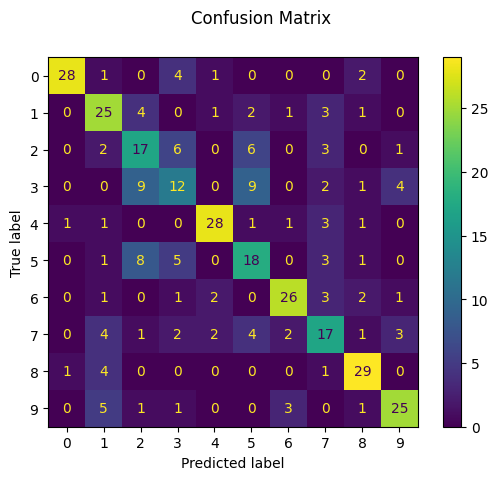

In [18]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()